#📌 Extracción

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Se extrae la informacion de JS y creamos un dataframe con el nombre "datos"
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
list(datos.columns)

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

#🔧 Transformación (T - Transform)

In [4]:
#normalizamos las columnas que tiene json anidados
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

In [5]:
#unir las columnas
datos = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [6]:
#verificamos si hay datos nulos y el tipo de dato de cada columna
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
#creamos un data frame con las columnas a utilizar
df_telecom = datos[['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']].copy()
df_telecom

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,One year,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Month-to-month,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Month-to-month,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Month-to-month,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Month-to-month,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,One year,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Month-to-month,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Month-to-month,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Two year,Mailed check,67.85,4627.65


In [8]:
#cambiar el tipo de dato de la columna Charges.Total a float64
# Reemplazar las cadenas vacías (' ') con np.nan antes de la conversión a float
df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(' ', np.nan).astype('float64')
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            7267 non-null   object 
 1   gender           7267 non-null   object 
 2   SeniorCitizen    7267 non-null   int64  
 3   Partner          7267 non-null   object 
 4   Dependents       7267 non-null   object 
 5   tenure           7267 non-null   int64  
 6   Contract         7267 non-null   object 
 7   PaymentMethod    7267 non-null   object 
 8   Charges.Monthly  7267 non-null   float64
 9   Charges.Total    7256 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 567.9+ KB


In [9]:
#filtrar los registros del dataframe df_telecom las cuales los datos de las columnas 'Churn' no sean vacios
df_telecom = df_telecom[df_telecom['Churn'] != ''].copy()
df_telecom

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,One year,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Month-to-month,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Month-to-month,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Month-to-month,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Month-to-month,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,One year,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Month-to-month,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Month-to-month,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Two year,Mailed check,67.85,4627.65


In [10]:
#crear una columna "Cuentas_Diarias" que utiliza la facturación mensual para calcular el valor diario
df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly'] / 30
df_telecom

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,One year,Mailed check,65.60,593.30,2.186667
1,No,Male,0,No,No,9,Month-to-month,Mailed check,59.90,542.40,1.996667
2,Yes,Male,0,No,No,4,Month-to-month,Electronic check,73.90,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Month-to-month,Electronic check,98.00,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Month-to-month,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,One year,Mailed check,55.15,742.90,1.838333
7263,Yes,Male,0,Yes,No,22,Month-to-month,Electronic check,85.10,1873.70,2.836667
7264,No,Male,0,No,No,2,Month-to-month,Mailed check,50.30,92.75,1.676667
7265,No,Male,0,Yes,Yes,67,Two year,Mailed check,67.85,4627.65,2.261667


In [11]:
# convertir los valores de 'Yes'/'No' a 1/0
mapeo_binario = {'Yes': 1, 'No': 0}

# Aplicar el mapeo a las columnas 'Churn', 'Partner' y 'Dependents'
df_telecom['Churn'] = df_telecom['Churn'].replace(mapeo_binario).astype('int64')
df_telecom['Partner'] = df_telecom['Partner'].replace(mapeo_binario).astype('int64')
df_telecom['Dependents'] = df_telecom['Dependents'].replace(mapeo_binario).astype('int64')

df_telecom.head()

/tmp/ipython-input-1075883130.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom['Churn'] = df_telecom['Churn'].replace(mapeo_binario).astype('int64')
/tmp/ipython-input-1075883130.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom['Partner'] = df_telecom['Partner'].replace(mapeo_binario).astype('int64')
/tmp/ipython-input-1075883130.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0,Female,0,1,1,9,One year,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,Month-to-month,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,Month-to-month,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,Month-to-month,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,Month-to-month,Mailed check,83.9,267.40,2.796667


In [12]:
# Para renombrar varias columnas, creamos un diccionario con los nombres actuales y los nuevos nombres
mapeo_columnas = {
    'Churn': 'cancelacion',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_64',
    'Partner': 'con_pareja',
    'Dependents': 'con_dependientes',
    'tenure': 'meses_contrato',
    'Contract': 'tipo_contrato',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'facturacion_mensual',
    'Charges.Total': 'facturacion_total',
    'Cuentas_Diarias': 'cuentas_diarias'
}

df_telecom.rename(columns=mapeo_columnas, inplace=True)
df_telecom.head()

,cancelacion,genero,mayor_64,con_pareja,con_dependientes,meses_contrato,tipo_contrato,metodo_pago,facturacion_mensual,facturacion_total,cuentas_diarias
0,0,Female,0,1,1,9,One year,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,Month-to-month,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,Month-to-month,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,Month-to-month,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,Month-to-month,Mailed check,83.9,267.40,2.796667


In [13]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cancelacion          7043 non-null   int64  
 1   genero               7043 non-null   object 
 2   mayor_64             7043 non-null   int64  
 3   con_pareja           7043 non-null   int64  
 4   con_dependientes     7043 non-null   int64  
 5   meses_contrato       7043 non-null   int64  
 6   tipo_contrato        7043 non-null   object 
 7   metodo_pago          7043 non-null   object 
 8   facturacion_mensual  7043 non-null   float64
 9   facturacion_total    7032 non-null   float64
 10  cuentas_diarias      7043 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 660.3+ KB


#📊 Carga y análisis(L - Load & Analysis)

In [14]:
#Análisis Descriptivo
df_telecom.describe()

,cancelacion,mayor_64,con_pareja,con_dependientes,meses_contrato,facturacion_mensual,facturacion_total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


In [15]:
evasion = df_telecom.groupby('cancelacion').size()
evasion

,0
cancelacion,
0,5174
1,1869


In [16]:
# Crear un DataFrame a partir de la serie evacion
evasion = evasion.reset_index()
evasion.columns = ['cancelacion', 'count']
evasion


,cancelacion,count
0,0,5174
1,1,1869


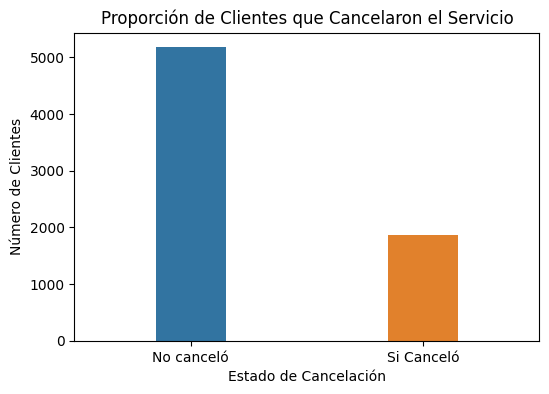

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapear los valores binarios a etiquetas descriptivas
evasion['cancelacion_etiqueta'] = evasion['cancelacion'].map({0: 'No canceló', 1: 'Si Canceló'})

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x='cancelacion_etiqueta', y='count', data=evasion, hue='cancelacion_etiqueta', legend=False, width=0.3)
plt.title('Proporción de Clientes que Cancelaron el Servicio')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Número de Clientes')
plt.show()

In [18]:
#como se distribuye la evasión según la colummna género
evasion_genero = df_telecom[df_telecom['cancelacion'] == 1].groupby(['genero']).size().reset_index(name='count')
evasion_genero

,genero,count
0,Female,939
1,Male,930


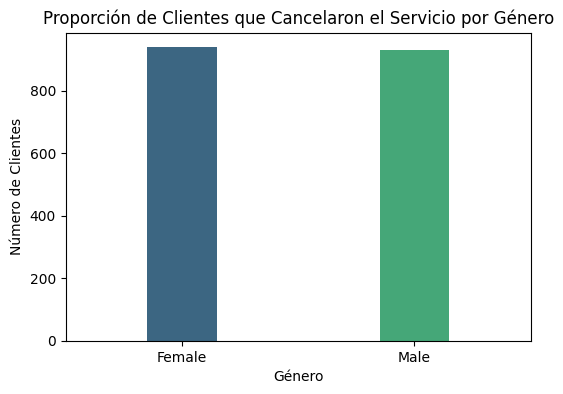

In [19]:
#grafico de barras de la evasion segun el genero

plt.figure(figsize=(6, 4))
sns.barplot(x='genero', y='count', data=evasion_genero, hue='genero', legend=False, width=0.3, palette='viridis')
plt.title('Proporción de Clientes que Cancelaron el Servicio por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

In [20]:
#como se distribuye la evasión según el tipo de contrato
evasion_contrato = df_telecom[df_telecom['cancelacion'] == 1].groupby(['tipo_contrato']).size().reset_index(name='count')
evasion_contrato

,tipo_contrato,count
0,Month-to-month,1655
1,One year,166
2,Two year,48


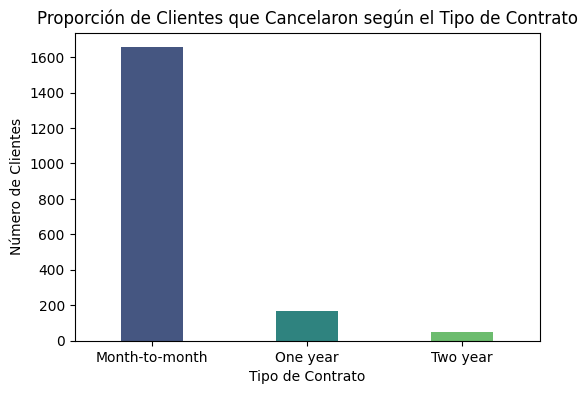

In [21]:
#grafico de barras de la evasion segun el tipo de contrato

plt.figure(figsize=(6, 4))
sns.barplot(x='tipo_contrato', y='count', data=evasion_contrato, hue='tipo_contrato', legend=False, width=0.4, palette='viridis')
plt.title('Proporción de Clientes que Cancelaron según el Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

In [22]:
#como se distribuye la evasión según la edad
evasion_edad = df_telecom[df_telecom['cancelacion'] == 1].groupby(['mayor_64']).size().reset_index(name='count')
evasion_edad

,mayor_64,count
0,0,1393
1,1,476


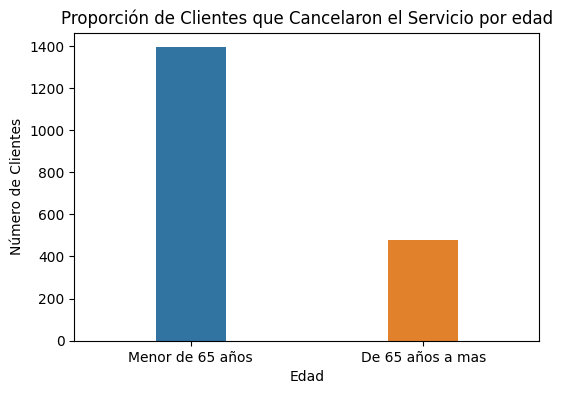

In [23]:
# Mapear los valores binarios a etiquetas descriptivas
evasion_edad['edad_etiqueta'] = evasion_edad['mayor_64'].map({0: 'Menor de 65 años', 1: 'De 65 años a mas'})

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x='edad_etiqueta', y='count', data=evasion_edad, hue='edad_etiqueta', legend=False, width=0.3)
plt.title('Proporción de Clientes que Cancelaron el Servicio por edad')
plt.xlabel('Edad')
plt.ylabel('Número de Clientes')
plt.show()

In [24]:
#como se distribuye la evasión según el metodo de pago
evasion_pago = df_telecom[df_telecom['cancelacion'] == 1].groupby(['metodo_pago']).size().reset_index(name='count')
evasion_pago = evasion_pago.sort_values(by='count', ascending=False)
evasion_pago

,metodo_pago,count
2,Electronic check,1071
3,Mailed check,308
0,Bank transfer (automatic),258
1,Credit card (automatic),232


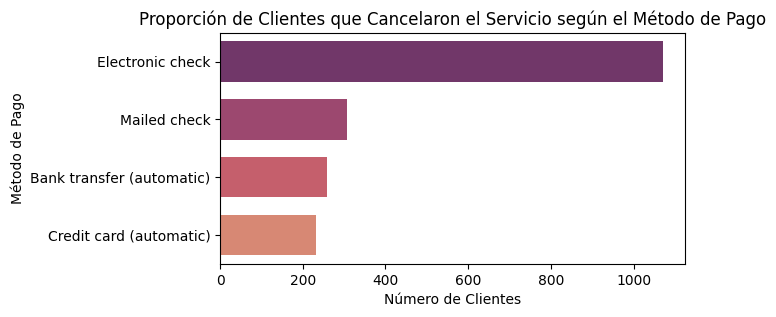

In [25]:
#grafico de barras de la evasion segun el metodo de pago

plt.figure(figsize=(6, 3))
sns.barplot(y='metodo_pago', x='count', data=evasion_pago, hue='metodo_pago', legend=False, palette='flare_r', width=0.7)
plt.title('Proporción de Clientes que Cancelaron el Servicio según el Método de Pago')
plt.ylabel('Método de Pago')
plt.xlabel('Número de Clientes')
plt.show()

In [26]:
#Como el "tiempo de contrato", se distribuyen de los clientes que cancelaron y los que no cancelaron

tiempo_contrato = df_telecom.groupby('cancelacion')['meses_contrato'].mean().reset_index()
tiempo_contrato

,cancelacion,meses_contrato
0,0,37.569965
1,1,17.979133


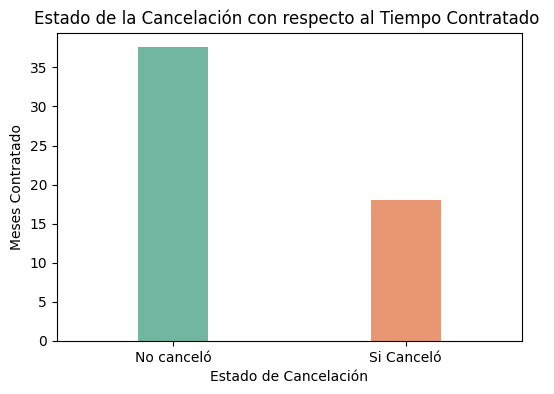

In [28]:
#grafico de barras de la distribucion de los clientes que cancelaron y los que no cancelaron

# Mapear los valores binarios a etiquetas descriptivas
tiempo_contrato['cancelacion_etiqueta'] = tiempo_contrato['cancelacion'].map({0: 'No canceló', 1: 'Si Canceló'})

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x='cancelacion_etiqueta', y='meses_contrato', data=tiempo_contrato, hue='cancelacion_etiqueta', legend=False, width=0.3, palette='Set2')
plt.title('Estado de la Cancelación con respecto al Tiempo Contratado ')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Meses Contratado')
plt.show()

In [27]:
#Como el "total gastado", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron

total_gastado = df_telecom.groupby('cancelacion')['facturacion_total'].mean().reset_index()
total_gastado

,cancelacion,facturacion_total
0,0,2555.344141
1,1,1531.796094


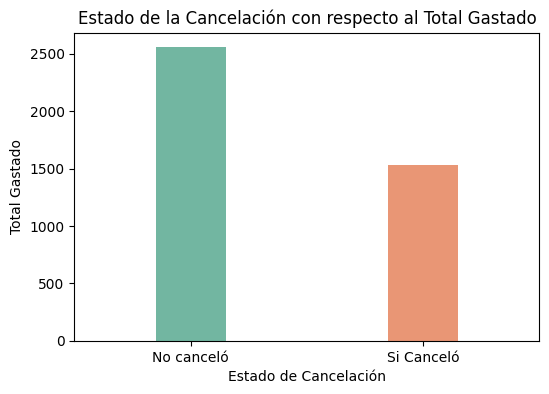

In [29]:
#grafico de barras de la distribucion de los clientes que cancelaron y los que no cancelaron

# Mapear los valores binarios a etiquetas descriptivas
total_gastado['cancelacion_etiqueta'] = total_gastado['cancelacion'].map({0: 'No canceló', 1: 'Si Canceló'})

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x='cancelacion_etiqueta', y='facturacion_total', data=total_gastado, hue='cancelacion_etiqueta', legend=False, width=0.3, palette='Set2')
plt.title('Estado de la Cancelación con respecto al Total Gastado')
plt.xlabel('Estado de Cancelación')
plt.ylabel('Total Gastado')
plt.show()

#📄 Informe Ejecutivo: Análisis de Evasión de Clientes (Telecom X)

##1. Introducción

El presente informe tiene como objetivo analizar el comportamiento de los clientes de la empresa de telecomunicaciones "Telecom X" para comprender las razones detrás de la cancelación de servicios (Churn).

La evasión de clientes representa uno de los mayores desafíos en la industria. A través de este análisis de datos, buscamos identificar patrones clave que nos permitan proponer estrategias para minimizar la fuga de clientes.

##2. Limpieza y Tratamiento de Datos

Para garantizar la calidad del análisis, se llevó a cabo un proceso de procesamiento de datos (ETL):

* Se importaron los datos desde un archivo JSON. Se utilizó la técnica de normalización (pd.json_normalize) para "aplanar" algunas estructuras anidadas y consolidarlas en un único DataFrame.

* Se detectó que la columna Charges.Total contenía espacios vacíos que impedían cálculos numéricos. Estos se transformaron a NaN y posteriormente la columna se convirtió a tipo float.

* Se filtraron y eliminaron los registros donde la variable objetivo Churn estaba vacía, resultando en un dataset final de 7043 clientes.

* Se creó la columna Cuentas_Diarias para entender el gasto diario promedio basado en la facturación mensual.

* Se transformaron variables categóricas binarias (Yes/No) a numéricas (1/0) para facilitar el análisis estadístico y se renombraron las columnas para mejorar la legibilidad del informe.

##3. Análisis Exploratorio de Datos

A través de las visualizaciones generadas, se han detectado los siguientes comportamientos:

* Se observa un desbalance en las clases, donde la mayoría de los clientes se mantienen (No canceló), pero existe una porción significativa (aprox. 26.5%) que sí ha cancelado el servicio.

* El gráfico de barras por género muestra una distribución casi idéntica entre hombres y mujeres que cancelan. Conclusión: El género no es una variable determinante para la evasión.

* Aunque hay menos clientes de la tercera edad en total, es necesario vigilar este segmento ya que pueden tener necesidades de soporte técnico más específicas.

* El gráfico de "Evasión según Tipo de Contrato" es revelador. La inmensa mayoría de las cancelaciones (1,655 casos) provienen de clientes con contratos de "Mes a mes", mientras que los contratos de uno o dos años tienen tasas de fuga mínimas.

* Los clientes que pagan mediante "Cheque Electrónico" tienen la tasa de cancelación más alta (1,071 casos), superando por mucho a otros métodos automáticos o por correo.

* Los clientes que cancelaron tenían, en promedio, una antigüedad de ~18 meses, frente a los ~37 meses de los clientes que se quedaron. Esto indica que el riesgo de fuga es crítico durante el primer año y medio.

##4. Conclusiones e Insights

1. La libertad del contrato "Mes a mes" es el
principal catalizador de la evasión. Los clientes sin compromiso a largo plazo son altamente volátiles.

2. Existe una correlación fuerte entre el uso de cheques electrónicos y la cancelación. Esto podría indicar problemas en la experiencia de usuario con este método de pago o que este método es preferido por clientes menos comprometidos.

3. Si logramos que un cliente supere el año y medio de antigüedad, la probabilidad de que se mantenga en la empresa aumenta drásticamente (su lealtad se duplica en términos de meses).

3. Los clientes que cancelan tienen una facturación total histórica mucho menor (~1,531) comparada con los fieles (~2,555), lo cual es lógico debido a su menor antigüedad, pero representa una pérdida.

##5. Recomendaciones

1. Diseñar campañas agresivas para mover a los clientes de "Mes a mes" a contratos de "1 año" o "2 años". Ofrecer descuentos en la mensualidad o servicios adicionales.

2. Investigar si el proceso de pago con cheque electrónico presenta fallos técnicos o fricción para el usuario. Incentivar el cambio a Tarjeta de Crédito Automática ofreciendo un pequeño descuento ya que este método muestra menor evasión.

3. Crear un programa de seguimiento durante el primer año. Los clientes nuevos deben sentir el valor del servicio rápidamente para evitar que se vayan antes de alcanzar la madurez promedio de 18 meses.

4. No gastar recursos en campañas diferenciadas por género, ya que no afectan. Enfocar los esfuerzos de marketing en el tipo de contrato y la antigüedad del cliente.